## Recommender System - AMZN

A recommender system: The general goal is that given a matrix of users and items, predict what score a user would
choose for an item they have yet to review.

Motivation: Recommender Systems provide non-parametric comparisons between items. They are foundational in how individuals are served and thus navigate the web.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

In [85]:
sample_data_path = "https://s3.amazonaws.com/amazon-reviews-pds/tsv/sample_us.tsv"
rev_df = pd.read_table(sample_data_path)
rev_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,18778586,RDIJS7QYB6XNR,B00EDBY7X8,122952789,Monopoly Junior Board Game,Toys,5,0,0,N,Y,Five Stars,Excellent!!!,2015-08-31
1,US,24769659,R36ED1U38IELG8,B00D7JFOPC,952062646,56 Pieces of Wooden Train Track Compatible wit...,Toys,5,0,0,N,Y,Good quality track at excellent price,Great quality wooden track (better than some o...,2015-08-31
2,US,44331596,R1UE3RPRGCOLD,B002LHA74O,818126353,Super Jumbo Playing Cards by S&S Worldwide,Toys,2,1,1,N,Y,Two Stars,Cards are not as big as pictured.,2015-08-31
3,US,23310293,R298788GS6I901,B00ARPLCGY,261944918,Barbie Doll and Fashions Barbie Gift Set,Toys,5,0,0,N,Y,my daughter loved it and i liked the price and...,my daughter loved it and i liked the price and...,2015-08-31
4,US,38745832,RNX4EXOBBPN5,B00UZOPOFW,717410439,Emazing Lights eLite Flow Glow Sticks - Spinni...,Toys,1,1,1,N,Y,DONT BUY THESE!,Do not buy these! They break very fast I spun ...,2015-08-31


In [87]:
rev_df = rev_df[["customer_id", "product_id", "star_rating"]]
rev_df.rename(columns={"star_rating" : "score"}, inplace=True)
rev_df.head()

,customer_id,product_id,score
0,18778586,B00EDBY7X8,5
1,24769659,B00D7JFOPC,5
2,44331596,B002LHA74O,2
3,23310293,B00ARPLCGY,5
4,38745832,B00UZOPOFW,1


## Handle a correct representation for each customer and product storing in a dictionary

product_id -> P####

customer_id -> R####

In [88]:
print(rev_df.shape[0])
print(rev_df["product_id"].unique().shape[0])

49
49


In [89]:
p_ID_dict = {pID: "P" + str(idx) for idx, pID in enumerate(rev_df["product_id"].unique())}
r_ID_dict = {rID: "r" + str(idx) for idx, rID in enumerate(rev_df["customer_id"].unique())}

print([" : ".join([k, p_ID_dict[k]]) for k in list(p_ID_dict.keys())[:5]])
print([" : ".join([str(k), r_ID_dict[k]]) for k in list(r_ID_dict.keys())[:5]])


['B00EDBY7X8 : P0', 'B00D7JFOPC : P1', 'B002LHA74O : P2', 'B00ARPLCGY : P3', 'B00UZOPOFW : P4']
['18778586 : r0', '24769659 : r1', '44331596 : r2', '23310293 : r3', '38745832 : r4']


In [90]:
rev_df.loc[:,"product_id"] = rev_df.loc[:,"product_id"].map(p_ID_dict)
rev_df.loc[:,"customer_id"] = rev_df.loc[:,"customer_id"].map(r_ID_dict)
rev_df.head()

,customer_id,product_id,score
0,r0,P0,5
1,r1,P1,5
2,r2,P2,2
3,r3,P3,5
4,r4,P4,1


In [91]:
rev_df.to_csv("synthetic_review.csv")

## EDA

In [93]:
rev_df = pd.read_csv("synthetic_review.csv").drop(["Unnamed: 0"], axis=1)
rev_df.head()

,customer_id,product_id,score
0,r0,P0,5
1,r1,P1,5
2,r2,P2,2
3,r3,P3,5
4,r4,P4,1


In [94]:
rev_df.head()

,customer_id,product_id,score
0,r0,P0,5
1,r1,P1,5
2,r2,P2,2
3,r3,P3,5
4,r4,P4,1


In [95]:
rev_df["score"].value_counts()

5    33
3     5
1     5
4     4
2     2
Name: score, dtype: int64

In [99]:
import csv

tsv_data = "amazon_reviews_us_Camera_v1_00.tsv"

tsv_labels = []
tsv_data = []

#rev_all_data = pd.read_csv("amazon_reviews_us_Camera_v1_00.tsv", sep="\t")
with open("amazon_reviews_us_Camera_v1_00.tsv", "r") as tsv_in:
    tsv_reader = csv.reader(tsv_in, delimiter="\t")
    tsv_labels = tsv_reader.__next__()
    for record in tsv_reader:
        tsv_data.append(record)

In [104]:
print(len(tsv_labels))
print(len(tsv_data[0]))
print([s for s in tsv_labels[:10]])
print([s for s in tsv_data[:1]])


15
15
['marketplace', 'customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 'product_category', 'star_rating', 'helpful_votes', 'total_votes']
[['US', '2975964', 'R1NBG94582SJE2', 'B00I01JQJM', '860486164', 'GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ only)', 'Camera', '5', '0', '0', 'N', 'Y', 'Five Stars', 'ok', '2015-08-31']]


In [137]:
rev_df = pd.DataFrame([tsv_data[i][:15] for i in range(len(tsv_data))], columns=tsv_labels)

In [138]:
rev_df.shape

(1800886, 15)

In [141]:
rev_df = rev_df[["customer_id", "product_id", "star_rating"]]
rev_df.rename(columns = {"star_rating" : "score"}, inplace=True)
rev_df.head()

,customer_id,product_id,score
0,2975964,B00I01JQJM,5
1,23526356,B00TCO0ZAA,5
2,52764145,B00B7733E0,2
3,47348933,B006ZN4U34,5
4,33680700,B00HUEBGMU,5


In [155]:
# Map the customer_id to something like: R####, where #### is the enumerate number
# Map the product_id to something like: P####, where #### is the enumerate number

p_ID_dict = {pID : "P" + str(idx) for idx, pID in enumerate(rev_df["product_id"].unique())}
r_ID_dict = {rID : "R" + str(idx) for idx, rID in enumerate(rev_df["customer_id"].unique())}

In [159]:
print([" : ".join([str(k), p_ID_dict[k]]) for k in list(p_ID_dict.keys())[:5]])
print([" : ".join([str(k), r_ID_dict[k]]) for k in list(r_ID_dict.keys())[:5]])

['B00I01JQJM : P0', 'B00TCO0ZAA : P1', 'B00B7733E0 : P2', 'B006ZN4U34 : P3', 'B00HUEBGMU : P4']
['2975964 : R0', '23526356 : R1', '52764145 : R2', '47348933 : R3', '33680700 : R4']


In [160]:
rev_df.loc[:,"product_id"] = rev_df.loc[:,"product_id"].map(p_ID_dict)
rev_df.loc[:,"customer_id"] = rev_df.loc[:,"customer_id"].map(r_ID_dict)
rev_df.head()

,customer_id,product_id,score
0,R0,P0,5
1,R1,P1,5
2,R2,P2,2
3,R3,P3,5
4,R4,P4,5


In [161]:
rev_df.to_csv("synthetic_review_v1_00.csv")

In [162]:
rev_df = pd.read_csv("synthetic_review_v1_00.csv").drop(["Unnamed: 0"], axis=1)
rev_df.head()

,customer_id,product_id,score
0,R0,P0,5
1,R1,P1,5
2,R2,P2,2
3,R3,P3,5
4,R4,P4,5


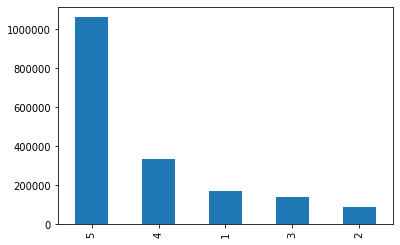

In [164]:
rev_df["score"].value_counts().plot(kind="bar")

In [165]:
rev_df["score"].value_counts()

5    1062038
4     336513
1     170055
3     141373
2      90907
Name: score, dtype: int64

In [168]:
# Interesting preponderanse of 5
print(rev_df["product_id"].value_counts())

P983       4652
P3957      4399
P340       3618
P55        3562
P1013      3177
           ... 
P166481       1
P73395        1
P38396        1
P148990       1
P86621        1
Name: product_id, Length: 168640, dtype: int64


In [176]:
print(rev_df["product_id"].value_counts().value_counts())
print(rev_df["product_id"].value_counts().value_counts().index)
print(len(rev_df["product_id"].value_counts().value_counts().index))

1       72836
2       25015
3       13400
4        8529
5        6053
        ...  
1579        1
360         1
428         1
487         1
639         1
Name: product_id, Length: 669, dtype: int64
Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
             938,  872,  616,  811,  939, 1579,  360,  428,  487,  639],
           dtype='int64', length=669)
669


In [171]:
print(rev_df["product_id"].value_counts()[:15])
print(rev_df["product_id"].value_counts()[-5:])

P983     4652
P3957    4399
P340     3618
P55      3562
P1013    3177
P957     2352
P1424    2315
P278     2269
P1170    2241
P2581    2234
P4434    2184
P861     2089
P382     2024
P1662    2001
P1820    1953
Name: product_id, dtype: int64
P166481    1
P73395     1
P38396     1
P148990    1
P86621     1
Name: product_id, dtype: int64


4652
72836


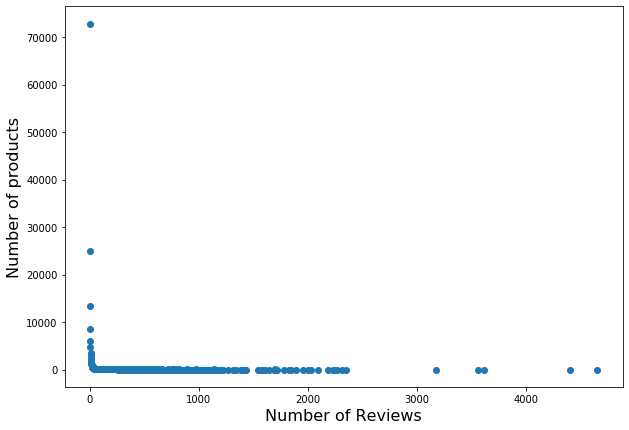

In [179]:
# plotting
product_w_n_reviews = rev_df["product_id"].value_counts().value_counts()
print(max(product_w_n_reviews.index))
print(max(product_w_n_reviews))
plt.figure(figsize=(10,7))
plt.scatter(product_w_n_reviews.index, product_w_n_reviews)
plt.xlabel("Number of Reviews", fontsize=16)
plt.ylabel("Number of products", fontsize=16)
plt.show()

In [180]:
print(rev_df.columns)

Index(['customer_id', 'product_id', 'score'], dtype='object')


In [181]:
print(rev_df["customer_id"].value_counts()[:15])
print(rev_df["customer_id"].value_counts()[-5:])

R3406      285
R42275     191
R13452     171
R103928    148
R589598    146
R65496     145
R71129     140
R511       130
R47973     129
R50483     126
R35459     126
R59533     126
R97961     123
R77        120
R100095    114
Name: customer_id, dtype: int64
R106883    1
R680660    1
R902838    1
R939927    1
R876324    1
Name: customer_id, dtype: int64


285
842656


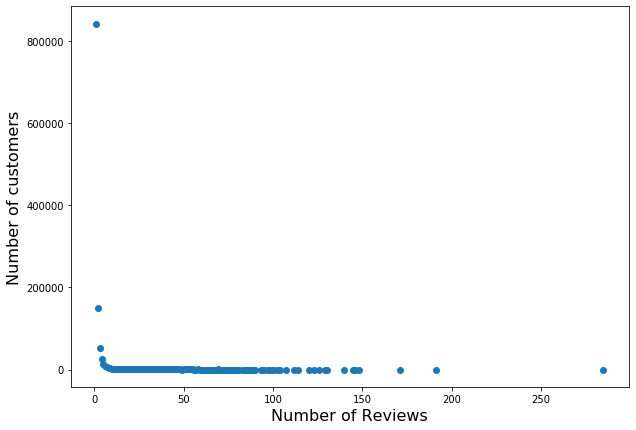

In [182]:
customer_w_n_reviews = rev_df["customer_id"].value_counts().value_counts()
print(max(customer_w_n_reviews.index))
print(max(customer_w_n_reviews))
plt.figure(figsize=(10,7))
plt.scatter(customer_w_n_reviews.index, customer_w_n_reviews)
plt.xlabel("Number of Reviews", fontsize=16)
plt.ylabel("Number of customers", fontsize=16)
plt.show()

## Functioning of Recommerder Systems

Let's explore the following synthetic data.
Below we have a set of rankings of six musicians made by six individuals.


In [187]:
ex = pd.DataFrame({
    "Mozart" : [0, 5, 5, 5, 3, 2],
    "Bach" :   [1, 0, 4, 5, 3, 2], 
    "Chopin"  : [2, 3, 0, 5, 4, 1],
    "Brahms" : [2, 2, 5, 0, 3, 1],
    "Wagner" : [1, 3, 3, 2, 0, 3],
    "Liszt" :  [3, 3, 2, 1, 2, 0]
}, index = ["Abel", "Baker", "Charlie", "David", "Erik", "Frank"])

In [188]:
ex.head()

,Mozart,Bach,Chopin,Brahms,Wagner,Liszt
Abel,0,1,2,2,1,3
Baker,5,0,3,2,3,3
Charlie,5,4,0,5,3,2
David,5,5,5,0,2,1
Erik,3,3,4,3,0,2


In [189]:
ex_hand = ex.iloc[:3, -3:]
ex_hand

,Brahms,Wagner,Liszt
Abel,2,1,3
Baker,2,3,3
Charlie,5,3,2


In [190]:
brahms = ex_hand["Brahms"]
wagner = ex_hand["Wagner"]
diff = brahms - wagner
euclidian_distance = np.round(np.sum([n**2 for n in diff])**0.5, 3)
print("Euclidian distance = ", euclidian_distance)

Euclidian distance =  2.449


### To normalize this between 0 and 1, the transformation from "euclidian_distance" to similarity is 1/(1+dist)
### If dist = 0 then similarity is 1

In [193]:
def euclidian_similarity(ser1, ser2):
    diff = ser1 - ser2
    dist = np.linalg.norm(diff)
    return 1/(1+dist)

In [194]:
print(euclidian_similarity(ex_hand["Brahms"], ex_hand["Wagner"]))

0.28989794855663564


### Pearson correlation: Ranges from -1 to 1 and the way to convert it to similarity is:
1/2 + P/2

In [195]:
def pearson_similarity(ser1, ser2):
    def normalize(raw):
        return .5 + raw/2
    
    corr = np.corrcoef(ser1, ser2)[0][1]
    return normalize(corr)

In [196]:
print(pearson_similarity(ex_hand["Brahms"], ex_hand["Wagner"]))

0.75


### Cosine similarity: Is the dot product of two vectors over the product of the norm of the two vectors

In [216]:
def cosine_similarity(ser1, ser2):
    def normalize(raw):
        return .5 + raw/2
    cosT = np.dot(ser1, ser2)/(np.linalg.norm(ser1)*np.linalg.norm(ser2))
    return normalize(cosT)

In [217]:
print(cosine_similarity(ex_hand["Brahms"], ex_hand["Wagner"]))

0.9592657617027512


In [202]:
def drop_val(df, to_drop):
    for col in df.columns:
        df = df[df[col] != to_drop]
    return df

In [203]:
df = ex.loc[:, "Mozart":"Bach"]
to_drop = 5
print(drop_val(df, to_drop))

       Mozart  Bach
Abel        0     1
Erik        3     3
Frank       2     2


In [214]:
def drop_rows_with_zeros(df):
    keep = np.intersect1d(df.iloc[:,0].to_numpy().nonzero(), df.iloc[:,1].to_numpy().nonzero())
    return df.iloc[keep,:]

#python
A = np.array([10,4,6,7,1,5,0,4,24,1,1,9,10,10,18])
B = np.array([1,4,5,6,7,8,9])
D = np.array([2,3,4,0,7,8,1,2,4,5,6,18,7,8,10])
print(len(A))
print(len(D))
C = np.array([i for i in set(A) if i in B])
print([x for x in C])

df_test = pd.DataFrame({
    "A" : A,
    "D" : D
})

drop_rows_with_zeros(df_test)

15
15
[1, 4, 5, 6, 7, 9]


/Users/mabisrror/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


,A,D
0,10,2
1,4,3
2,6,4
4,1,7
5,5,8
7,4,2
8,24,4
9,1,5
10,1,6
11,9,18


In [209]:
import itertools
print(ex)
for c in itertools.combinations(ex.columns, 2):
    print(c)

         Mozart  Bach  Chopin  Brahms  Wagner  Liszt
Abel          0     1       2       2       1      3
Baker         5     0       3       2       3      3
Charlie       5     4       0       5       3      2
David         5     5       5       0       2      1
Erik          3     3       4       3       0      2
Frank         2     2       1       1       3      0
('Mozart', 'Bach')
('Mozart', 'Chopin')
('Mozart', 'Brahms')
('Mozart', 'Wagner')
('Mozart', 'Liszt')
('Bach', 'Chopin')
('Bach', 'Brahms')
('Bach', 'Wagner')
('Bach', 'Liszt')
('Chopin', 'Brahms')
('Chopin', 'Wagner')
('Chopin', 'Liszt')
('Brahms', 'Wagner')
('Brahms', 'Liszt')
('Wagner', 'Liszt')


In [210]:
ex[list(("Mozart", "Bach"))]

,Mozart,Bach
Abel,0,1
Baker,5,0
Charlie,5,4
David,5,5
Erik,3,3
Frank,2,2


## Building a dictionary with a key of the musicians being compared, and value of another dictionary. In that second dictionary, keys of "Euclid", "Pearson", "Cosine" with values of similarities calculated with relevant method.

In [218]:
sim_scores = dict()

for c in itertools.combinations(ex.columns, 2):
    df = drop_rows_with_zeros(ex[list(c)])
    ser1 = df.iloc[:,0]
    ser2 = df.iloc[:,1]
    scores = {"Euclid": euclidian_similarity(ser1, ser2),
              "Pearson": pearson_similarity(ser1, ser2),
              "Cosine" : cosine_similarity(ser1, ser2)
             }
    key = ", ".join(c)
    sim_scores[key] = scores

sims = pd.DataFrame.from_dict(sim_scores, orient="index")
sims

,Euclid,Pearson,Cosine
"Mozart, Bach",0.500000,0.973365,0.997200
"Mozart, Chopin",0.289898,0.841565,0.976331
"Mozart, Brahms",0.240253,0.809035,0.964008
"Mozart, Wagner",0.190744,0.333333,0.964765
"Mozart, Liszt",0.154387,0.500000,0.962910
"Bach, Chopin",0.366025,0.927618,0.983997
"Bach, Brahms",0.366025,0.915761,0.982382
"Bach, Wagner",0.231662,0.690693,0.945785
"Bach, Liszt",0.166667,0.021909,0.863054
"Chopin, Brahms",0.414214,0.974342,0.994881


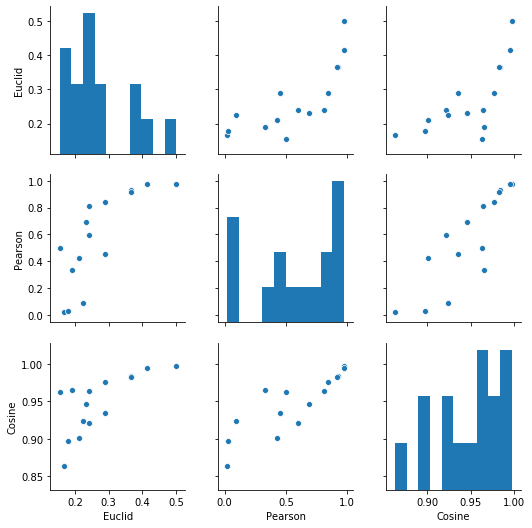

In [223]:
sns.pairplot(sims)

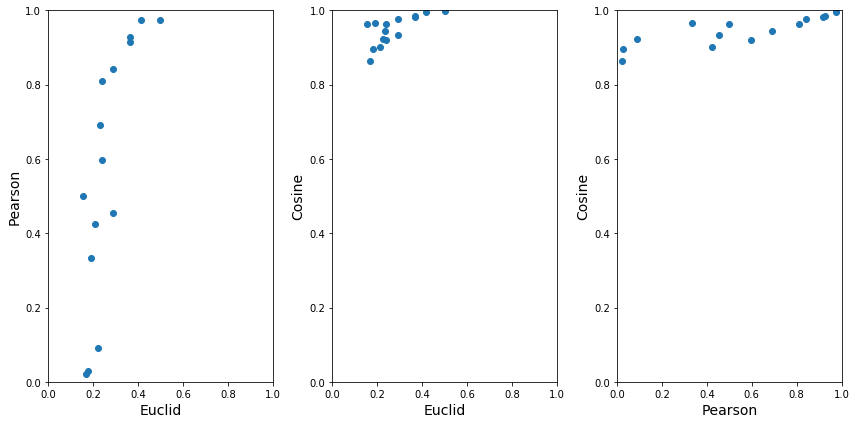

In [225]:
plt.figure(figsize=(12,6))
for i, cols in enumerate([("Euclid", "Pearson"), ("Euclid", "Cosine"), ("Pearson","Cosine")]):
    plt.subplot(1, 3, i+1)
    plt.scatter(sims[cols[0]], sims[cols[1]])
    plt.xlabel(cols[0], fontsize=14)
    plt.ylabel(cols[1], fontsize=14)
    plt.xlim(0,1)
    plt.ylim(0,1)
plt.tight_layout()

## Differences in Similarity Scores

One final technique - not implemented above - is to normalize scores before calculating a euclidean similarity score. For example, a the mean score might be subtracted to center all scores around 0. This would help to spread the Euclidean similarity scores out over the entire length of 0-1 instead of clustering them below. aprox .6

As should be evidenced by the above graphics, it is possible to see a range of similarities scores given different techniques. These similarities scores will majorly impact how a recommender systems performs. Please refer to the lectures for the particular impacts and strengths of the different similarity calculations.


So, Abel's predicted score for Mozart will sum Abel's score of every other musician times that musician's similarity score with respect to Mozart and divide by the sum of similarities scores.

In [229]:
mozSimScores = dict()
for mus in ex.columns[1:]:
    no_zeros = drop_rows_with_zeros(ex[["Mozart", mus]])
    mozSimScores[mus] = round(pearson_similarity(no_zeros.iloc[:,0], no_zeros.iloc[:,1]), 2)

print(mozSimScores)

{'Bach': 0.97, 'Chopin': 0.84, 'Brahms': 0.81, 'Wagner': 0.33, 'Liszt': 0.5}


In [231]:
sScores = []
abelS = []
for k in mozSimScores:
    ss = mozSimScores[k]
    sScores.append(ss)
    abelS.append(ss*ex.loc["Abel",k])
answer = sum(abelS)/sum(sScores)
print("The Abel's score for Mozart is {}".format(answer))

The Abel's score for Mozart is 1.7681159420289854
